# Introudction 


The work to follow is a forecast of demand. The point main is to determine rules of association and otimization for decision making. 

In [13]:
import pandas as pd 
import numpy as np 
import matplotlib as plt
from sklearn.linear_model  import  LinearRegression 
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import  train_test_split 
from sklearn.ensemble import RandomForestRegressor


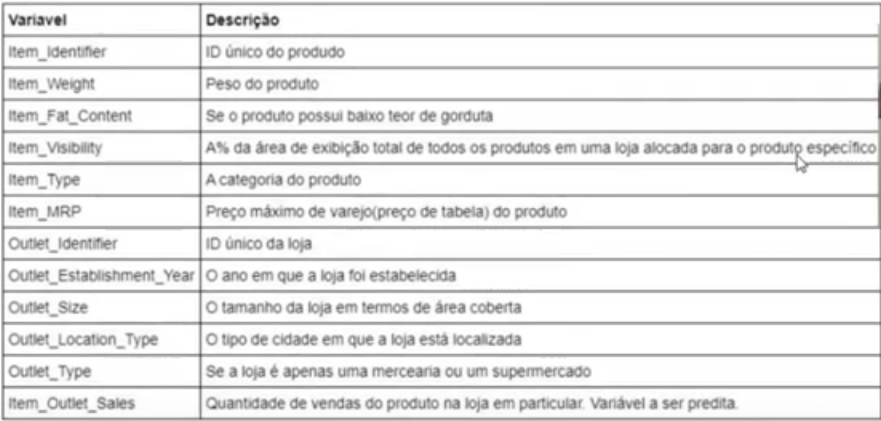

In [34]:
from PIL import Image 
%matplotlib inline 
im = Image.open('describe_dados.png')
im

In [29]:
df_Teste = pd.read_csv('test.csv')
df_train = pd.read_csv('train.csv')

In [30]:
df_Teste.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,18.100,0.022526,95.0094,2007,1713.7692,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
1,6.615,0.093575,199.4426,2002,3361.6242,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,11.850,0.050187,164.1526,2002,3124.5994,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
3,13.500,0.159969,147.6102,1999,1603.9122,0,0,1,0,0,...,0,1,0,1,0,0,0,1,0,0
4,14.000,0.029769,145.4786,1999,1300.3074,0,0,1,0,0,...,0,1,0,1,0,0,0,1,0,0


In [48]:
lista_colunas = []
lista_colunas = df_Teste.columns
lista_colunas = pd.DataFrame(lista_colunas,columns=['VARIAVEIS'])
lista_colunas

,VARIAVEIS
0,Item_Weight
1,Item_Visibility
2,Item_MRP
3,Outlet_Establishment_Year
4,Item_Outlet_Sales
5,Item_Fat_Content_LF
6,Item_Fat_Content_Low Fat
7,Item_Fat_Content_Regular
8,Item_Fat_Content_low fat
9,Item_Fat_Content_reg


Identificando e sabendo quais as variaveis a serem trabalhadas, teremos a interpretação dos dados da seguinte forma, os dados de tipo estão disposto em  